In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sudokudetector.image import debug, render
from sudokudetector.Sudoku import Sudoku

game = Sudoku('dataset/image205.jpg')
# print(game.help)

Sudoku('path/to/file')

    Data

    	.image_path = path to image file

    	.image_gray = bird eye view gray image

    	.image_binary = thresholded and denoised image

    	.cells = array of all grid

    	.help = detail of this object

    Function

    	.load_image() = load original image from self.image_path

    		return image_object

    	.sudoku_detect() = transfrom gray image to bird eye view

    		return None

    	.convert_binary(image_gray) = convert gray image to binary with GAUSSIAN Threshold

    		return image_object as converted

    	.filter_number(cell) = filter out border table and noise only cell

    		return blank_image_object if null number | image_object_has_only_number

    	.remove_image(image_binary) = remove anything from binary image

    		return blank_image_object

    	.create_contours(image_thresholded) = find all contours in image

    		return list_of_contours_found

    	.adap_threshold(image_gray) = adaptive GAUSSIAN threshold to image

    		ret

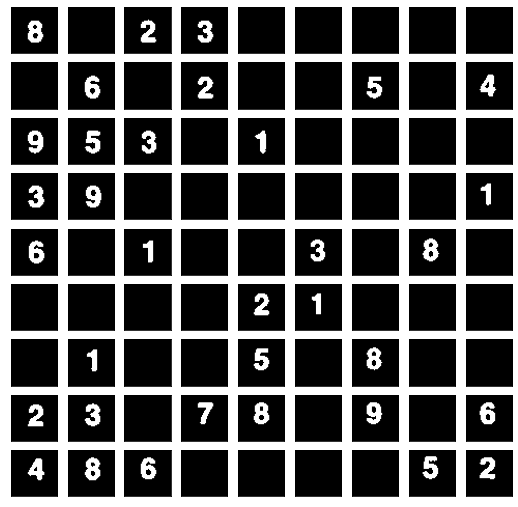

In [2]:
render(game.cells, (9, 9))

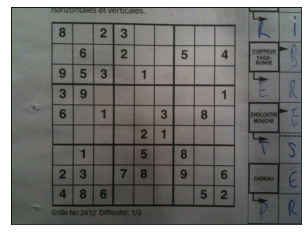

In [3]:
debug(game.load_image())

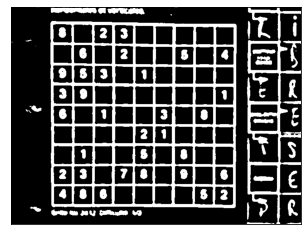

In [4]:
thresh =  cv2.cvtColor(game.load_image(), cv2.COLOR_BGR2GRAY)

thresh = game.adap_threshold(thresh)
# thresh = cv2.bitwise_not(thresh)
debug(thresh)

In [5]:
list_contours = game.create_contours(thresh)
output = game.load_image().copy()

# for c in list_contours:
#     cv2.drawContours(output, [c], -1, (0, 255, 0), 1)

table_contour = game.search_largest_square_contour(list_contours)
cv2.drawContours(output, [table_contour], -1, (0, 255, 0), 1)

debug(output)



AttributeError: 'Sudoku' object has no attribute 'search_big_square_contour'

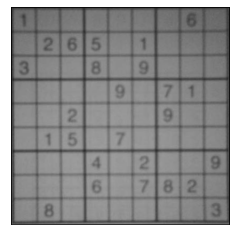

In [46]:
from imutils.perspective import four_point_transform

gray =  cv2.cvtColor(game.load_image(), cv2.COLOR_BGR2GRAY)
tranformed = four_point_transform(
            gray, table_contour.reshape(4, 2))
debug(tranformed)

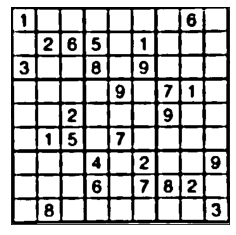

In [47]:
binary = game.convert_binary(tranformed)
debug(binary)

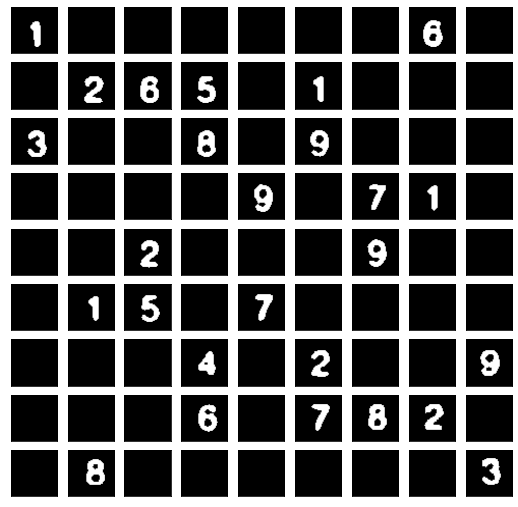

In [48]:
sudoku_splited = game.split_cells(binary)
render(sudoku_splited, (9, 9))